### Methodology


*   ###### **Data Cleaning:** As per the data description the data has already been cleaned.
*   ###### **Data Visualization:** In this context for finding the optimal k value we can use data visualization.
*   ###### **Feature Selection:** Based on data description and 

*   ###### **Model Selection:** Based on the data visualization and data correlation, we need to select a model that would best suit.

*   ###### **Evalution:** Using inner analysis as actual clustreing values are not available.



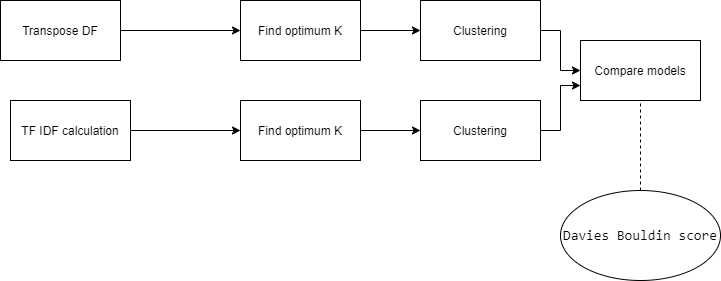

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("drive/My Drive/NIPS_1987-2015.csv")

In [4]:
df

,Unnamed: 0,1987_1,1987_2,1987_3,1987_4,1987_5,1987_6,1987_7,1987_8,1987_9,1987_10,1987_11,1987_12,1987_13,1987_14,1987_15,1987_16,1987_17,1987_18,1987_19,1987_20,1987_21,1987_22,1987_23,1987_24,1987_25,1987_26,1987_27,1987_28,1987_29,1987_30,1987_31,1987_32,1987_33,1987_34,1987_35,1987_36,1987_37,1987_38,1987_39,...,2015_364,2015_365,2015_366,2015_367,2015_368,2015_369,2015_370,2015_371,2015_372,2015_373,2015_374,2015_375,2015_376,2015_377,2015_378,2015_379,2015_380,2015_381,2015_382,2015_383,2015_384,2015_385,2015_386,2015_387,2015_388,2015_389,2015_390,2015_391,2015_392,2015_393,2015_394,2015_395,2015_396,2015_397,2015_398,2015_399,2015_400,2015_401,2015_402,2015_403
0,abalone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,abbeel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,abbott,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,abbreviate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,abbreviated,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11458,zoo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11459,zoom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11460,zou,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11461,zoubin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The data is a collection of words in papers and their frequency in 5812 papers in years 1987 - 2015

In [5]:
c=list(df)
words = list(df[c[0]])
df.drop(c[0],axis=1,inplace=True)

we can drop the word because only the count of the word is important than what is word itself is.

#### Clustering on Count of The word

In [6]:
df=df.T
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11423,11424,11425,11426,11427,11428,11429,11430,11431,11432,11433,11434,11435,11436,11437,11438,11439,11440,11441,11442,11443,11444,11445,11446,11447,11448,11449,11450,11451,11452,11453,11454,11455,11456,11457,11458,11459,11460,11461,11462
1987_1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987_2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987_3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987_5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015_399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015_400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015_401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015_402,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0


Transpsosing the data as each documnet is a single row giving count of different words. This is the format need to be used in case of document clustering.

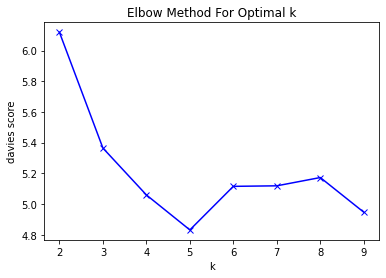

In [11]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
from sklearn.metrics import davies_bouldin_score
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(df)
   Sum_of_squared_distances.append(davies_bouldin_score(df, km.labels_))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('davies score')
plt.title('Elbow Method For Optimal k')
plt.show()

Finding optimal k value 

In [12]:
from sklearn.cluster import KMeans
num_clusters = Sum_of_squared_distances.index(min(Sum_of_squared_distances))+2
km = KMeans(n_clusters=num_clusters)
km.fit(df)
clusters = km.labels_.tolist()

Fitting model on count of of words

In [13]:
docs = c[1:]
frame1=pd.DataFrame(docs , columns=['docName'])

In [14]:
frame1['clusterid'] = clusters
frame1

,docName,clusterid
0,1987_1,4
1,1987_2,4
2,1987_3,4
3,1987_4,4
4,1987_5,4
...,...,...
5806,2015_399,2
5807,2015_400,2
5808,2015_401,2
5809,2015_402,2


In [15]:
labels = km.labels_
davies_bouldin_score(df, labels) 

4.850590228382116

davies bouldin score for evaluating clustering. The minimum value will be 0.

---



#### `Clustering on TF-IDF index of the word

TD-IDF is a statistical method used in NLP for document clustering,which will tell the importance of a word in a document. The term frequencymatrixis created using [https://www.tfidf.com/](http://www.tfidf.com/)



In [16]:
import numpy as np
doc_term_matrix=df.to_numpy()

In [18]:
def tfCalcForDoc(doc_term):
    docTfMat=[]
    totalWordCnt=np.sum(doc_term)
    for termCnt in doc_term:
        if totalWordCnt != 0:
            docTfMat.append(termCnt/totalWordCnt)
        else:
            docTfMat.append(0)
    return docTfMat

calculating TF of the document

In [19]:
doc_freq_array = []
for doc_term in doc_term_matrix:
    doc_freq_array.append(tfCalcForDoc(doc_term))

In [20]:
doc_freq_matrix=np.asmatrix(doc_freq_array)

In [21]:
df=df.T
df.shape

(11463, 5811)

In [22]:
def idfCalcForTerm(term_count_array_across_docs):
    # Total number of documents
    nr = len(term_count_array_across_docs)
    # Number of documents with term t in it
    dr = np.count_nonzero(term_count_array_across_docs)
    
    if dr != 0:
        return np.log10(nr/dr)
    else:
        return 0

calculating idf ofthe document

In [23]:
arr=np.squeeze(np.asarray(df))
idfArr=[]
for m in arr:
    idfArr.append(idfCalcForTerm(m))

In [24]:
cnt=0
for idfVals in idfArr:
    doc_freq_matrix[:,cnt] *= idfVals
    cnt+= 1

idf factor calculation

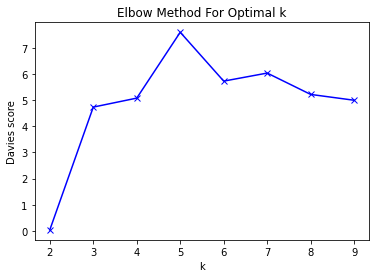

In [26]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k)
   km = km.fit(doc_freq_matrix)
   Sum_of_squared_distances.append(davies_bouldin_score(doc_freq_matrix, km.labels_))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies score')
plt.title('Elbow Method For Optimal k')
plt.show()

finding oprimal k

In [27]:
from sklearn.cluster import KMeans
num_clusters = Sum_of_squared_distances.index(min(Sum_of_squared_distances))+2
km = KMeans(n_clusters=num_clusters)
km.fit(doc_freq_matrix)
clusters = km.labels_.tolist()

In [28]:
docs = c[1:]
frame2=pd.DataFrame(docs , columns=['docName'])
frame2['clusterid'] = clusters
frame2

,docName,clusterid
0,1987_1,0
1,1987_2,0
2,1987_3,0
3,1987_4,0
4,1987_5,0
...,...,...
5806,2015_399,0
5807,2015_400,0
5808,2015_401,0
5809,2015_402,0


In [29]:
labels = km.labels_
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(doc_freq_matrix, labels) 

0.03564458840070297

Comaparing Both methods using davies bouldin score.

This is an internal evaluation scheme, where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset.

So, TF-IDF method has better feature information than counting values